<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Kouchakzade

**Student ID**: 400101837





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [1]:
# import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [238]:
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function.
    # You also need to make your code runnable on gpu!

    def __init__(self) :
        self.__coef = np.array([])
        self.__intercept = 0
    
    def fit(self,X,y,max_epoch,learning_rate) :
        self.__n = X.shape[1]
        self.__coef = np.zeros((self.__n,1),dtype=np.float64)
        y_pred , prev_log_loss = self.predict(X) , np.Inf
        for _ in range(max_epoch):
            coef , intercept = self.gradinet_descent(X,y,y_pred)
            self.__coef, self.__intercept = self.__coef - learning_rate * coef, self.__intercept - learning_rate * intercept
            y_pred , log_loss = self.predict(X) , self.loss(y,y_pred)
            if np.abs(prev_log_loss - log_loss) < 1e-6 : break
            prev_log_loss = log_loss
        if _ == max_epoch - 1 : print(f'max epoch reached')
        print (f'log_loss : {log_loss:.4f} with {_} epoch \n')
        
    def predict(self,X):
        if X.shape[1] != self.__n : print('wrong input feature dimensiona'); return 0
        Z = X @ self.__coef + self.__intercept
        return np.array([ 1 / (1 + np.exp(-z)) for z in Z]).squeeze()
    
    def loss(self,y,y_pred) :
        return -np.mean(np.array([np.log(i) if y[indx] == 1 else np.log(1-i) for indx,i in enumerate(y_pred)]))
    
    def gradinet_descent(self,X,y,y_pred):
        return np.array([np.dot(y_pred - y,x_i) / X.shape[0] for x_i in X.T]).reshape(-1,1) , np.mean(y_pred - y)
        

def metrics(reg,X_train, X_test, y_train, y_test) :
    y_pred_train , y_pred_test= np.array(reg.predict(X_train) > 0.5,dtype=np.int32) , np.array(reg.predict(X_test) > 0.5,dtype=np.int32)
    cf_matrix_train , cf_matrix_test= confusion_matrix(y_train,y_pred_train) ,  confusion_matrix(y_test,y_pred_test)
    accuracy_train , accuracy_test = np.trace(cf_matrix_train) / y_train.shape[0] * 100 , np.trace(cf_matrix_test) / y_test.shape[0] * 100
    precision_train = cf_matrix_train[1,1] / (cf_matrix_train[1,1] + cf_matrix_train[0,1]) * 100
    precision_test = cf_matrix_test[1,1] / (cf_matrix_test[1,1] + cf_matrix_test[0,1]) * 100
    fig , axes = plt.subplots(1,3,figsize = (13,3))
    axes[0].set_title("train") , axes[1].set_title("test")
    ConfusionMatrixDisplay(cf_matrix_train).plot(ax=axes[0])
    ConfusionMatrixDisplay(cf_matrix_test).plot(ax=axes[1])
    bar1 = plt.bar([-0.15 , 0.85],[accuracy_train,precision_train],label="train",width=0.3)
    bar2 = plt.bar([0.15 , 1.15],[accuracy_test,precision_test],label="test",width=0.3)
    plt.xticks([0,1],['accuracy','precision'])
    plt.yticks(np.arange(0,101,20))
    plt.legend(loc = 'lower right')
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height - 7,f'{height:.1f}%',ha='center', va='bottom' , color = 'white')
    plt.show()

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

X_train shape : (320, 7) , y_train shape : (320,)
X_test shape : (80, 7) , y_test shape : (80,)
log_loss : 0.1352 with 506 epoch 



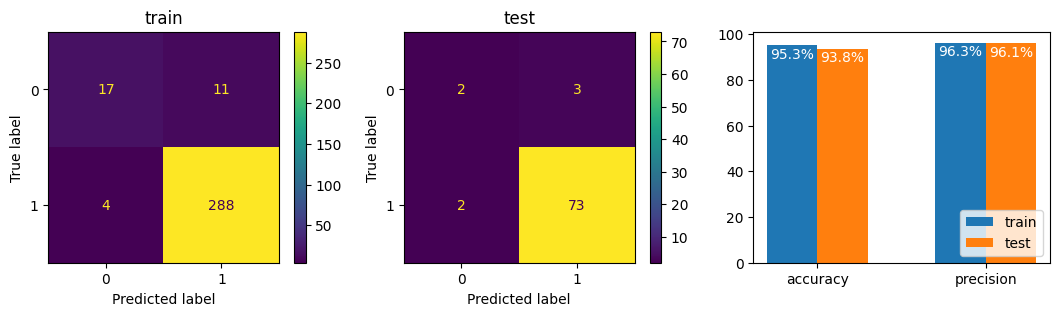

In [239]:
# Your code goes here!
data = pd.read_csv('./Q2/Logistic_question.csv').to_numpy()
input , output = data[:,:7] , data[:,7]
y = np.array(output >= 0.5,dtype=np.int32)
scale  = MinMaxScaler()
X = scale.fit_transform(input)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 40)
print(f'X_train shape : {X_train.shape} , y_train shape : {y_train.shape}')
print(f'X_test shape : {X_test.shape} , y_test shape : {y_test.shape}')

reg = MyLogisticRegression()
reg.fit(X_train,y_train,1000,20)
metrics(reg,X_train, X_test, y_train, y_test)

**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

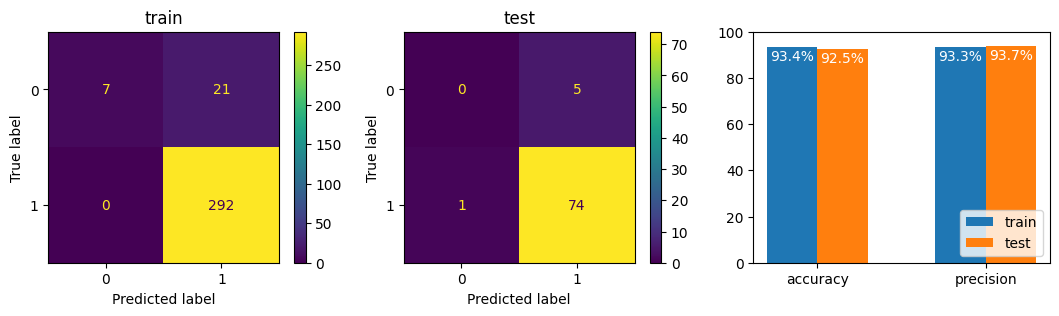

In [240]:
# Your code goes here!
reg = LogisticRegression()
reg.fit(X_train,y_train.squeeze())
metrics(reg,X_train, X_test, y_train, y_test)

**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [164]:
# import necessary libraries


class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function.
    # You also need to make your code runnable on gpu!

    def __init__(self) :
        pass
        
    def fit(self,X,y,max_epoch,learning_rate) :
        X = np.insert(X,0,1,axis=1)
        self.__m , self.__n , self.__j = X.shape[0] , X.shape[1] , np.max(y) + 1
        self.__coef  = np.zeros((self.__n,self.__j),dtype = np.float64)
        y_pred , prev_log_loss = self.predict(X,True) , np.Inf
        for _ in range(max_epoch) :
            coef = self.__gradient_descent(X,y,y_pred)
            self.__coef = self.__coef - learning_rate * coef
            y_pred , log_loss = self.predict(X,True) , self.__loss(y,y_pred)
            if np.abs(prev_log_loss - log_loss) < 1e-6 : break
            prev_log_loss = log_loss
        if _ == max_epoch - 1 : print(f'max epoch reached')
        print (f'log_loss : {log_loss:.4f} with {_} epoch \n')
        
    def predict(self,X,training = False) :
        if not training : X = np.insert(X,0,1,axis=1)
        Z = np.exp(X @ self.__coef)
        return Z / np.sum(Z, axis=1).reshape(-1,1) if training else np.argmax(Z / np.sum(Z, axis=1).reshape(-1,1),axis=1)
    
    def __gradient_descent(self,X,y,y_pred) :
        return  X.T @ (y_pred - np.eye(self.__j)[y]) / self.__m
    
    def __loss(self,y,y_pred) :
        return - np.mean([np.log(x[y[indx]]) for indx,x in enumerate(y_pred)])

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [174]:
# Your code goes here!
i = 2
y = np.array(output / (1 / i),dtype=np.int32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 40)
reg = MyMultinomialLogisticRegression()
reg.fit(X_train,y_train,20000,3)
print(f'for  i = {i} acc :',np.sum(reg.predict(X_train) == y_train) / 320)
print(f'for  i = {i} acc :',np.sum(reg.predict(X_test) == y_test) / 80)

log_loss : 0.1354 with 1248 epoch 

for  i = 2 acc : 0.95
for  i = 2 acc : 0.9375


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [ ]:
# Your code goes here!


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

**Task:** Handle null entries using your best method.

In [ ]:
# Your code goes here!


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [ ]:
# Your code goes here!


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [ ]:
# Your code goes here!


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [ ]:
# Your code goes here!


**Question:** Analyze the results.

**Your Answer:**